<a href="https://colab.research.google.com/github/Basimashehin/DL-projects/blob/master/stablediffussion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Dec 11 15:05:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install --upgrade git+http://github.com/huggingface/diffusers.git

  Cloning http://github.com/huggingface/diffusers.git to /tmp/pip-req-build-62zamxv5
  Running command git clone --filter=blob:none --quiet http://github.com/huggingface/diffusers.git /tmp/pip-req-build-62zamxv5
  Resolved http://github.com/huggingface/diffusers.git to commit 664e931bcbddd47c21c3d4d547221506f588b9e9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install transformers
!pip install xformers
!pip install scipy
!pip install accelarate
!pip install gradio


ERROR: Could not find a version that satisfies the requirement accelarate (from versions: none)
ERROR: No matching distribution found for accelarate


In [ ]:
from diffusers import StableDiffusionPipeline,EulerDiscreteScheduler

In [ ]:
model_id='stabilityai/stable-diffusion-2'

In [ ]:
scheduler=EulerDiscreteScheduler.from_pretrained(model_id,subfolder='scheduler')
pipe=StableDiffusionPipeline.from_pretrained(model_id,scheduler=scheduler)

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# cuda
pipe=pipe.to('cuda')

In [ ]:
def txtimg(prompt):
  img=pipe(prompt,height=768,width=768).images[0]
  return img

  0%|          | 0/50 [00:00<?, ?it/s]

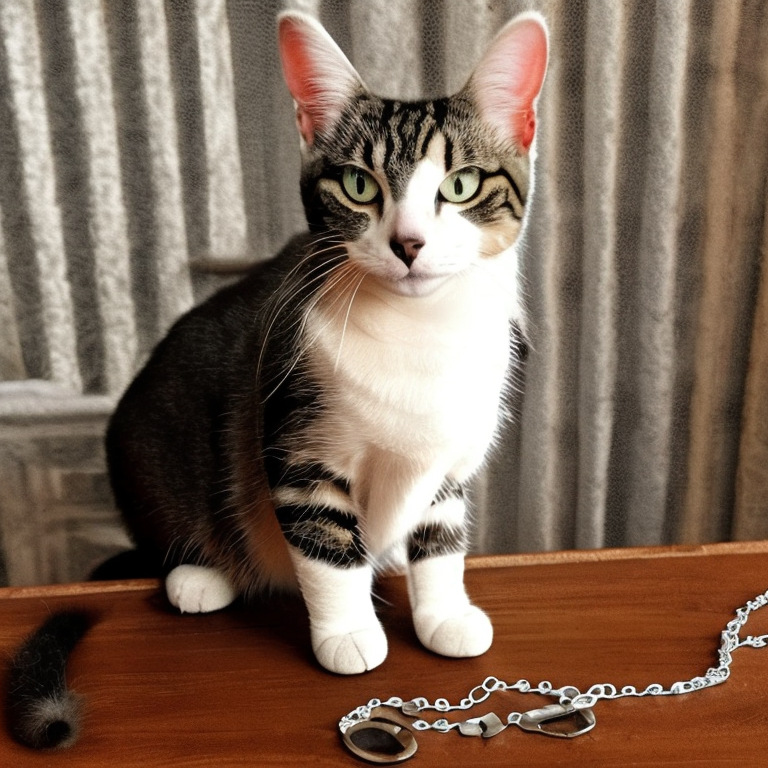

In [ ]:
prompt='A cat wearing necklace sitting on a table'
txtimg(prompt)

In [ ]:
import gradio as gr
def txtimg(prompt):
  img=pipe(prompt,height=768,width=768).images[0]
  return img

def printhello(prompt):
  return 'Hello'

demo=gr.Interface(fn=printhello,inputs='text',outputs='text')
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4ad7c64adce6c62dac.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
